# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [61]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [62]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1

#set measurement units
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 1 | pointe-du-lac
Processing Record 1 of Set 1 | olyokminsk
Processing Record 2 of Set 1 | vadso
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | la'ie
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | callao
Processing Record 8 of Set 1 | strezhevoy
Processing Record 9 of Set 1 | bereznik
Processing Record 10 of Set 1 | pinheiro machado
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | qaqortoq
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | gilgit
Processing Record 17 of Set 1 | port hedland
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | villamontes
Processing Record 22 

In [63]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,pointe-du-lac,46.2869,-72.6845,25.44,64,20,7.72,CA
1,olyokminsk,60.3736,120.4264,17.57,95,100,0.59,RU
2,vadso,70.0744,29.7487,13.49,94,100,5.14,NO
3,bethel,41.3712,-73.4140,30.36,58,0,3.60,US
4,thompson,55.7435,-97.8558,25.09,31,40,4.63,CA
...,...,...,...,...,...,...,...,...
564,barclayville,4.6797,-8.2339,24.38,80,94,3.42,LR
565,svetlyy,54.6750,20.1347,14.03,85,45,1.01,RU
566,balaka,-14.9793,34.9558,19.62,52,63,0.68,MW
567,pangai,-19.8000,-174.3500,24.06,78,75,8.75,TO


In [64]:
# Display sample data
city_data_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,pointe-du-lac,46.2869,-72.6845,25.44,64,20,7.72,CA
1,olyokminsk,60.3736,120.4264,17.57,95,100,0.59,RU
2,vadso,70.0744,29.7487,13.49,94,100,5.14,NO
3,bethel,41.3712,-73.4140,30.36,58,0,3.60,US
4,thompson,55.7435,-97.8558,25.09,31,40,4.63,CA
5,la'ie,21.6477,-157.9253,29.98,61,1,5.21,US
6,pisco,-13.7000,-76.2167,22.03,64,0,4.12,PE
7,callao,-12.0667,-77.1500,23.16,64,0,5.14,PE
8,strezhevoy,60.7333,77.5889,12.26,81,100,3.35,RU
9,bereznik,62.8551,42.7072,18.99,81,69,1.86,RU


In [65]:
# Export the City_Data into a csv
city_data_df.to_csv("HOMEWORK 6", index_label="City_ID")

In [66]:
# Read saved data
city_data_df = pd.read_csv("HOMEWORK 6", index_col="City_ID")

# Display sample data
city_data_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,pointe-du-lac,46.2869,-72.6845,25.44,64,20,7.72,CA
1,olyokminsk,60.3736,120.4264,17.57,95,100,0.59,RU
2,vadso,70.0744,29.7487,13.49,94,100,5.14,NO
3,bethel,41.3712,-73.4140,30.36,58,0,3.60,US
4,thompson,55.7435,-97.8558,25.09,31,40,4.63,CA
5,la'ie,21.6477,-157.9253,29.98,61,1,5.21,US
6,pisco,-13.7000,-76.2167,22.03,64,0,4.12,PE
7,callao,-12.0667,-77.1500,23.16,64,0,5.14,PE
8,strezhevoy,60.7333,77.5889,12.26,81,100,3.35,RU


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

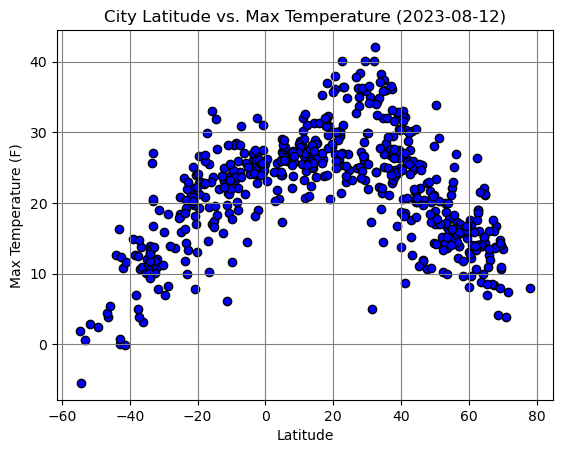

In [67]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-08-12)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (which="major",axis="both",linestyle="-",color="grey")

# Save the figure
plt.savefig("fig 1")

# Show plot
plt.show()

#### Latitude Vs. Humidity

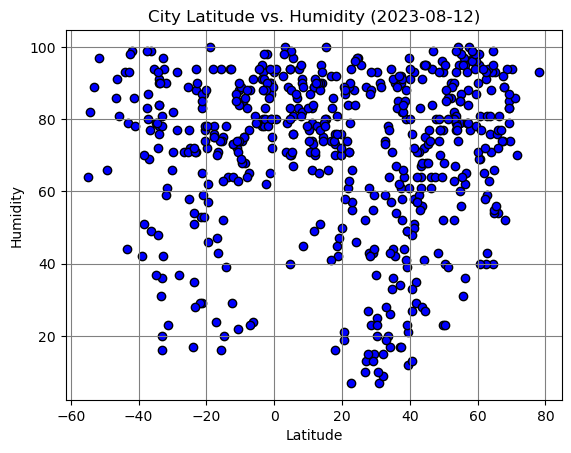

In [68]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-08-12)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (which="major",axis="both",linestyle="-",color="grey")

# Save the figure
plt.savefig("Fig2")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

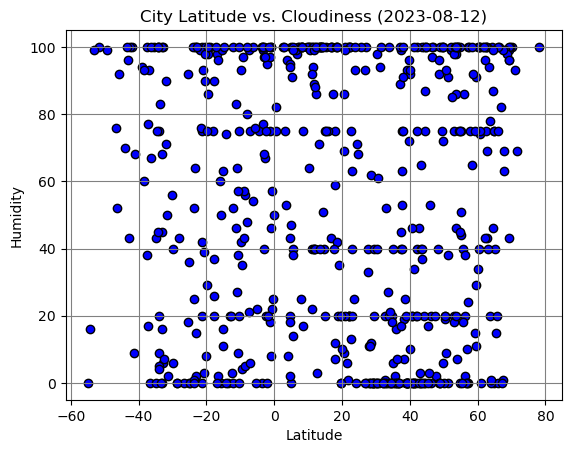

In [69]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-08-12)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (which="major",axis="both",linestyle="-",color="grey")

# Save the figure
plt.savefig("Fig3")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

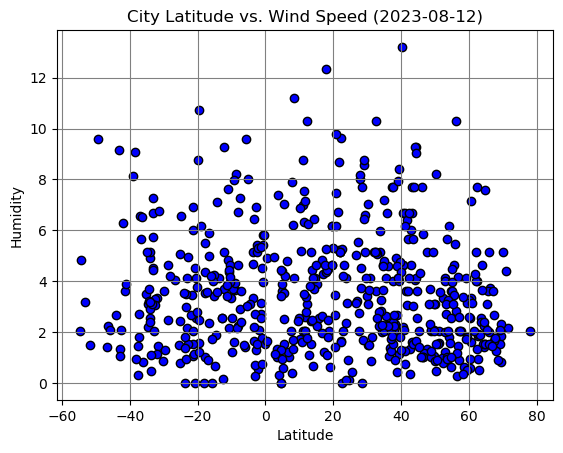

In [70]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-08-12)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (which="major",axis="both",linestyle="-",color="grey")

# Save the figure
plt.savefig("Fig4")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [71]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress.linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#I also figured I would use these lines of code later as well
#print(f"The Regression line is modeled by the equation {line_eq}")
#plt.plot(x_values,regress_values,"r-")

In [72]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,pointe-du-lac,46.2869,-72.6845,25.44,64,20,7.72,CA
1,olyokminsk,60.3736,120.4264,17.57,95,100,0.59,RU
2,vadso,70.0744,29.7487,13.49,94,100,5.14,NO
3,bethel,41.3712,-73.4140,30.36,58,0,3.60,US
4,thompson,55.7435,-97.8558,25.09,31,40,4.63,CA


In [73]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
6,pisco,-13.7000,-76.2167,22.03,64,0,4.12,PE
7,callao,-12.0667,-77.1500,23.16,64,0,5.14,PE
10,pinheiro machado,-31.5783,-53.3811,7.81,61,50,1.45,BR
12,invercargill,-46.4000,168.3500,3.90,91,52,2.24,NZ
15,hithadhoo,-0.6000,73.0833,27.54,75,22,5.81,MV


###  Temperature vs. Latitude Linear Regression Plot

The Regression line is modeled by the equation y = -0.25x + 32.47
The r-value is: -0.6408449787499837


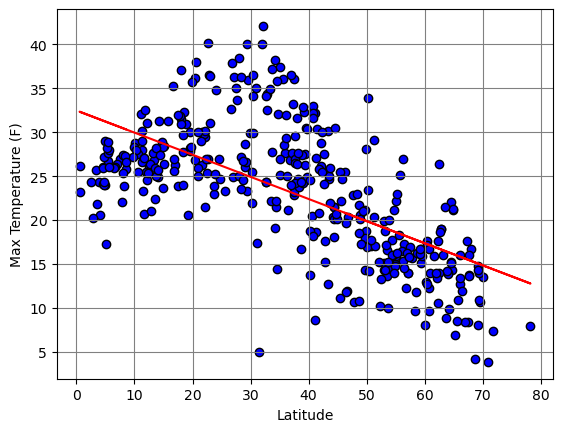

In [90]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope=linregress(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The Regression line is modeled by the equation {line_eq}")
print(f"The r-value is: {rvalue}")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (which="major",axis="both",linestyle="-",color="grey")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],edgecolors="black",facecolors="blue")
plt.plot(x_values, regress_values, "-r")

The Regression line is modeled by the equation y = 0.44x + 27.42
The r-value is: 0.795159496890341


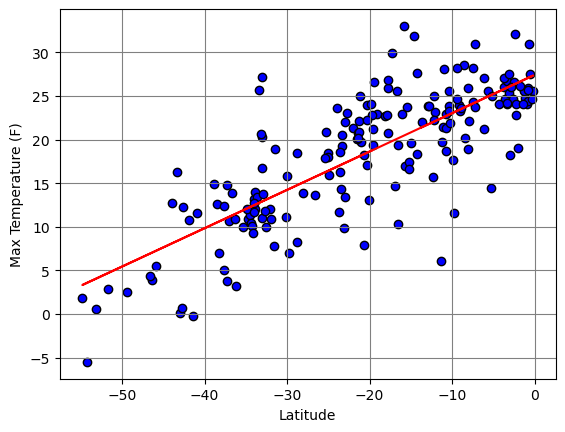

In [92]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope=linregress(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The Regression line is modeled by the equation {line_eq}")
print(f"The r-value is: {rvalue}")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (which="major",axis="both",linestyle="-",color="grey")
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],edgecolors="black",facecolors="blue")
plt.plot(x_values, regress_values, "-r")

**Discussion about the linear relationship:** In both the northern and southern hemispheres, there seems to be generally a relationship between latitute and maximum temperature, with the southern hemisphere having more of a coorelation. I believe that is because the northern hemisphere is currently in the summer, so the temperature is less dependent on latitude, and more reflective of the fact that the sun is currently more often over those areas. In the south it is more likely that the latiture is correlated to temperature because they are in winter (for example, locations in southern argentina are very cold, contrasted to areas in Colombia which is on the equator and always hot).

### Humidity vs. Latitude Linear Regression Plot

The Regression line is modeled by the equation y = 0.04x + 68.77
The r-value is: 0.030318405751510607


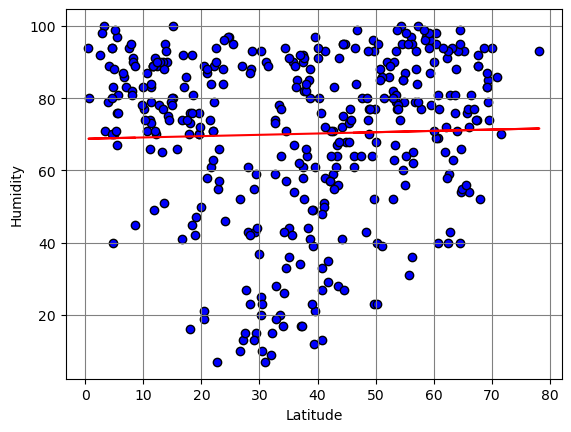

In [93]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope=linregress(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The Regression line is modeled by the equation {line_eq}")
print(f"The r-value is: {rvalue}")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (which="major",axis="both",linestyle="-",color="grey")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],edgecolors="black",facecolors="blue")
plt.plot(x_values, regress_values, "-r")

The Regression line is modeled by the equation y = 0.11x + 74.65
The r-value is: 0.07161748546587615


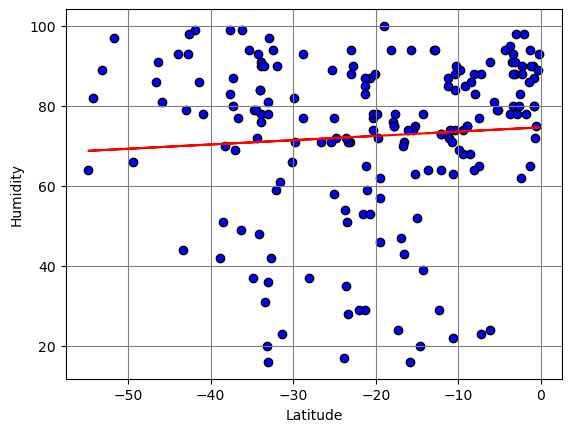

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope=linregress(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The Regression line is modeled by the equation {line_eq}")
print(f"The r-value is: {rvalue}")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (which="major",axis="both",linestyle="-",color="grey")
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],edgecolors="black",facecolors="blue")
plt.plot(x_values, regress_values, "-r")

**Discussion about the linear relationship:** There is basically no relationship between humidity and latitude (both r-values are close to 0). That's because proximity to bodies of water (where evaporation is most likely to happen) is not related to the latitude.  

### Cloudiness vs. Latitude Linear Regression Plot

The Regression line is modeled by the equation y = -0.06x + 54.64
The r-value is: -0.03031674574544897


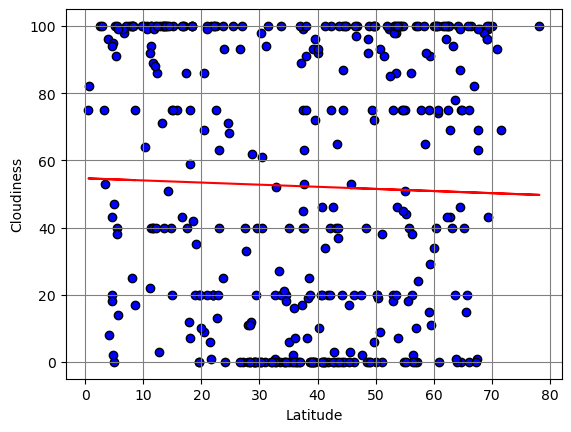

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope=linregress(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The Regression line is modeled by the equation {line_eq}")
print(f"The r-value is: {rvalue}")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (which="major",axis="both",linestyle="-",color="grey")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.plot(x_values, regress_values, "-r")

The Regression line is modeled by the equation y = -0.05x + 53.46
The r-value is: -0.017450987840916407


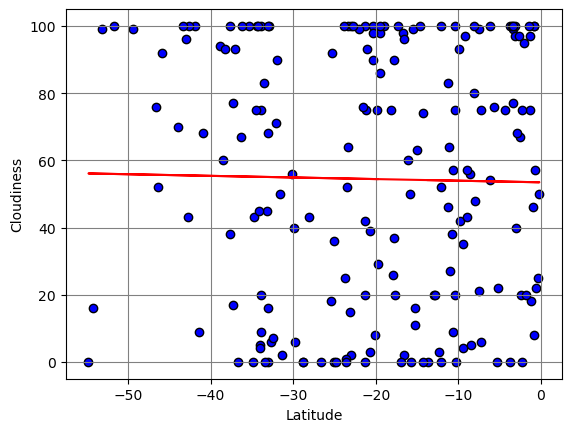

In [96]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope=linregress(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The Regression line is modeled by the equation {line_eq}")
print(f"The r-value is: {rvalue}")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (which="major",axis="both",linestyle="-",color="grey")
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.plot(x_values, regress_values, "-r")

**Discussion about the linear relationship:** Cloudiness, like humidity, has almost no relationship to latitude (both r-values are close to 0 for northern and southern hemispheres). That's because cloudiness is driven by humidity, and as mentioned before, the proximity to bodies of water (where evaporation, then cloudiness, is most likely to happen) is not related to the latitude.  

### Wind Speed vs. Latitude Linear Regression Plot

The Regression line is modeled by the equation y = -0.02x + 4.24
The r-value is: -0.17087313500114903


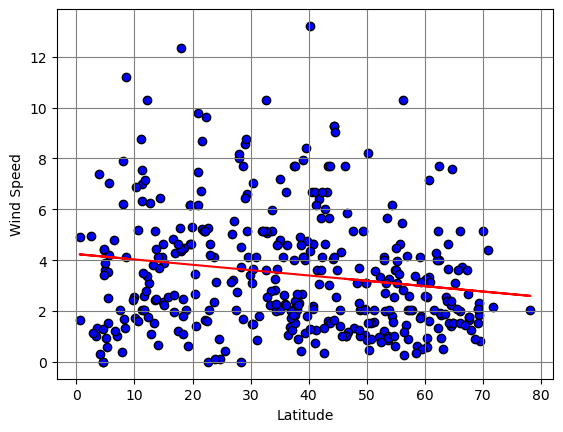

In [97]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope=linregress(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The Regression line is modeled by the equation {line_eq}")
print(f"The r-value is: {rvalue}")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (which="major",axis="both",linestyle="-",color="grey")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.plot(x_values, regress_values, "-r")

The Regression line is modeled by the equation y = 0.01x + 3.67
The r-value is: 0.031174774331888762


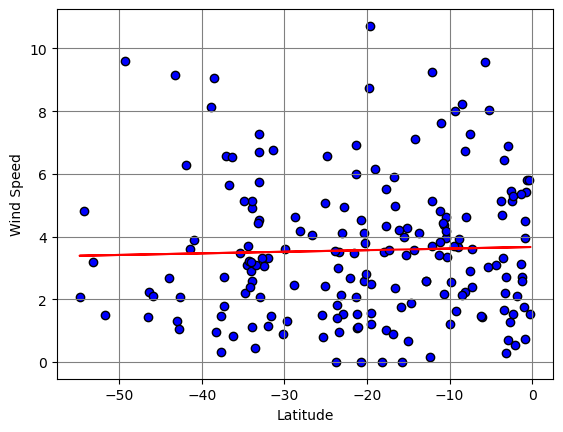

In [98]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope=linregress(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The Regression line is modeled by the equation {line_eq}")
print(f"The r-value is: {rvalue}")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (which="major",axis="both",linestyle="-",color="grey")
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.plot(x_values, regress_values, "-r")

**Discussion about the linear relationship:** Wind is caused by uneven heating of the earth's surface by the sun (source: https://www.eia.gov/energyexplained/wind/). Variances in the earth's surface, such as land vs water, is not related to the latitude. Therefore, I am not surprised that the r-value for both the northern and southern hemispheres for wind sp vs latitude is close to  0. 